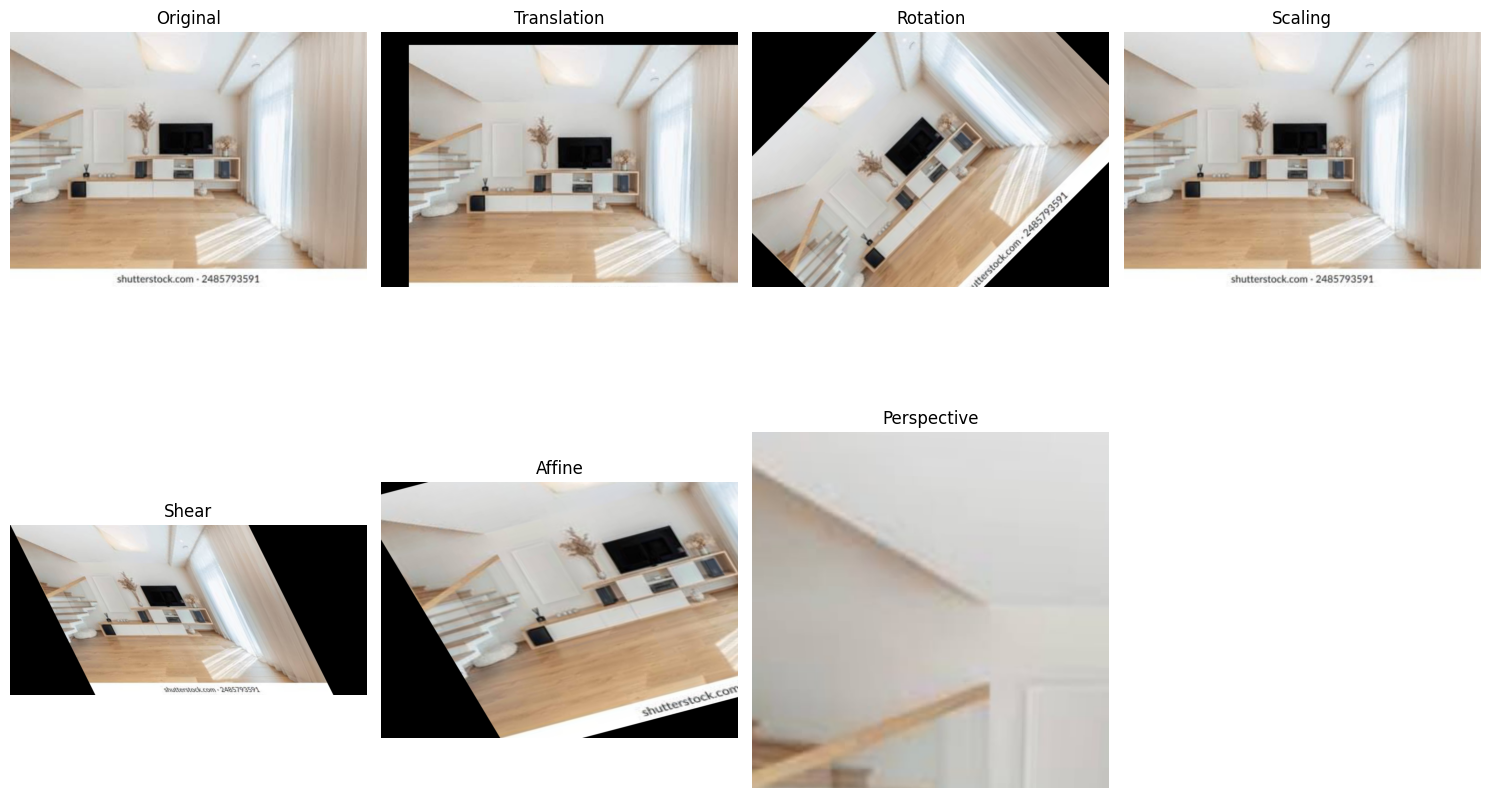

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load image
img = cv2.imread('/content/WhatsApp Image 2026-01-20 at 15.40.14 (1).jpeg')

# Check if image was loaded successfully
if img is None:
    print("Warning: 'input.jpg' not found. Creating a dummy image for demonstration.")
    # Create a dummy image (e.g., a white square)
    img = np.zeros((300, 400, 3), dtype=np.uint8)
    img.fill(255) # Fill with white color
    # Add some text or a shape to make it more interesting
    cv2.putText(img, "Dummy Image", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

rows, cols, ch = img.shape

# --- 1. TRANSLATION ---
# Shift 100 pixels right, 50 pixels down
M_trans = np.float32([[1, 0, 100], [0, 1, 50]])
dst_trans = cv2.warpAffine(img, M_trans, (cols, rows))

# --- 2. ROTATION ---
# Rotate 45 degrees around the center with scale 1.0
center = (cols // 2, rows // 2)
M_rot = cv2.getRotationMatrix2D(center, 45, 1.0)
dst_rot = cv2.warpAffine(img, M_rot, (cols, rows))

# --- 3. SCALING (Resizing) ---
# Scale to 1.5x width and 1.5x height
dst_scale = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# --- 4. SHEARING (Affinity) ---
# Shear along X-axis
M_shear = np.float32([[1, 0.5, 0], [0, 1, 0]])
dst_shear = cv2.warpAffine(img, M_shear, (int(cols*1.5), rows))

# --- 5. AFFINE TRANSFORMATION ---
# Needs 3 points to map from input to output
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
dst_affine = cv2.warpAffine(img, M_affine, (cols, rows))

# --- 6. PERSPECTIVE TRANSFORMATION ---
# Needs 4 points (useful for document scanning/tilting)
pts3 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts4 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M_persp = cv2.getPerspectiveTransform(pts3, pts4)
dst_persp = cv2.warpPerspective(img, M_persp, (300, 300))

# --- DISPLAY RESULTS ---
titles = ['Original', 'Translation', 'Rotation', 'Scaling', 'Shear', 'Affine', 'Perspective']
images = [img, dst_trans, dst_rot, dst_scale, dst_shear, dst_affine, dst_persp]

plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(2, 4, i+1)
    # Convert BGR (OpenCV) to RGB (Matplotlib)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()